In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import itertools
%matplotlib inline
from matplotlib import rcParams
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel("CMOHistoricalDataMonthly.xlsx", sheet_name='Monthly Prices', skiprows=6)
data.head()

,Unnamed: 0,CRUDE_PETRO,CRUDE_BRENT,CRUDE_DUBAI,CRUDE_WTI,COAL_AUS,COAL_SAFRICA,NGAS_US,NGAS_EUR,NGAS_JP,...,COAL_COL,COPRA,iSTL_JP_INDX,STL_JP_CROLL,STL_JP_HROLL,STL_JP_REBAR,STL_JP_WIROD,COTTON_MEMPH,RUBBER1_US,WHEAT_CANADI
0,1960M01,1.63,..,1.63,..,..,..,0.14,0.404774,..,...,..,257,..,..,..,..,..,..,..,64
1,1960M02,1.63,..,1.63,..,..,..,0.14,0.404774,..,...,..,248,..,..,..,..,..,..,..,64.09
2,1960M03,1.63,..,1.63,..,..,..,0.14,0.404774,..,...,..,236,..,..,..,..,..,..,..,63.76
3,1960M04,1.63,..,1.63,..,..,..,0.14,0.404774,..,...,..,214,..,..,..,..,..,..,..,63.35
4,1960M05,1.63,..,1.63,..,..,..,0.14,0.404774,..,...,..,206,..,..,..,..,..,..,..,63.11


In [3]:
# changing the column "Unnamed: 0" to "Date"
data['Date'] = data['Unnamed: 0'].values
data.drop(['Unnamed: 0'], axis=1, inplace=True)
data.head()

,CRUDE_PETRO,CRUDE_BRENT,CRUDE_DUBAI,CRUDE_WTI,COAL_AUS,COAL_SAFRICA,NGAS_US,NGAS_EUR,NGAS_JP,iNATGAS,...,COPRA,iSTL_JP_INDX,STL_JP_CROLL,STL_JP_HROLL,STL_JP_REBAR,STL_JP_WIROD,COTTON_MEMPH,RUBBER1_US,WHEAT_CANADI,Date
0,1.63,..,1.63,..,..,..,0.14,0.404774,..,3.624357,...,257,..,..,..,..,..,..,..,64,1960M01
1,1.63,..,1.63,..,..,..,0.14,0.404774,..,3.624357,...,248,..,..,..,..,..,..,..,64.09,1960M02
2,1.63,..,1.63,..,..,..,0.14,0.404774,..,3.624357,...,236,..,..,..,..,..,..,..,63.76,1960M03
3,1.63,..,1.63,..,..,..,0.14,0.404774,..,3.624357,...,214,..,..,..,..,..,..,..,63.35,1960M04
4,1.63,..,1.63,..,..,..,0.14,0.404774,..,3.624357,...,206,..,..,..,..,..,..,..,63.11,1960M05


In [4]:
data = data[['Date','COCOA']]
data.head()

,Date,COCOA
0,1960M01,0.6340
1,1960M02,0.6080
2,1960M03,0.5789
3,1960M04,0.5983
4,1960M05,0.6001


In [5]:
# changing the Date to datetime object
data['Date'] = data['Date'].apply(lambda x: datetime(year=int(x.split("M")[0]), month=int(x.split("M")[1]), day=1))

In [6]:
type(data['Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [7]:
data.set_index(data['Date'], inplace=True)
data.drop(['Date'], axis=1, inplace=True)
data.head()

,COCOA
Date,
1960-01-01,0.6340
1960-02-01,0.6080
1960-03-01,0.5789
1960-04-01,0.5983
1960-05-01,0.6001


In [8]:
data.shape

(719, 1)

In [9]:
# making a copy of the original data to use in future
ts = data.copy()

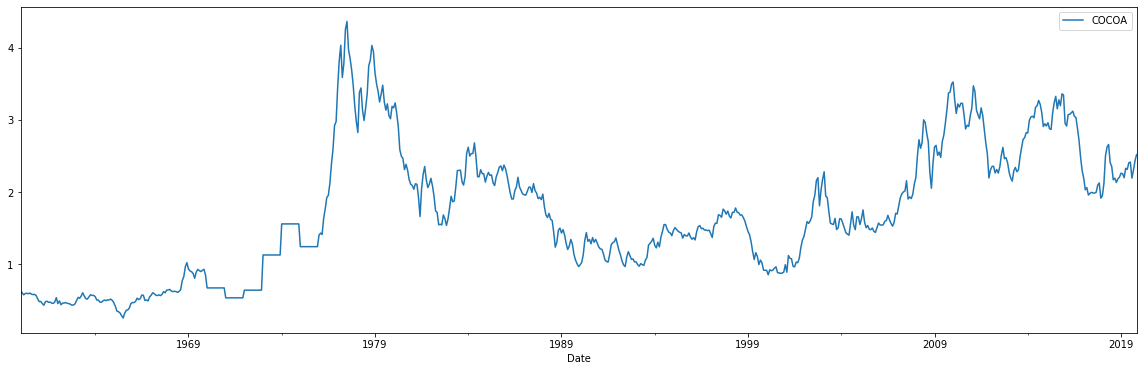

In [10]:
ts.plot(figsize=(20,6));

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

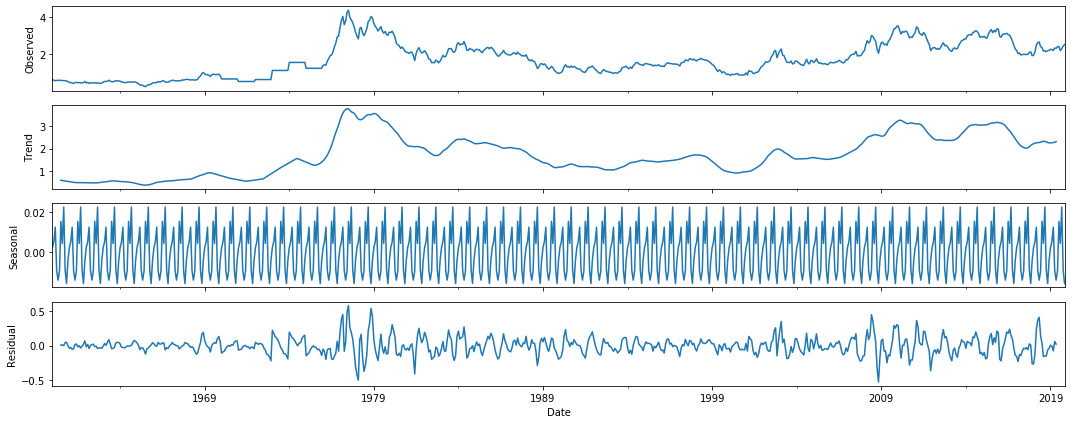

In [12]:
decompose = seasonal_decompose(ts, model='additive',freq=12 )
rcParams['figure.figsize'] = 15,6
fig = decompose.plot()

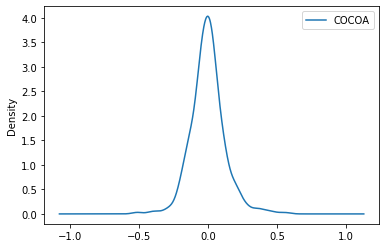

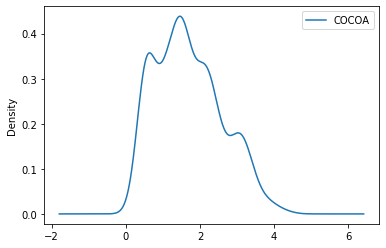

In [13]:
rcParams['figure.figsize'] = 6,4
fig = decompose.resid.plot(kind='kde')
fig_prob = ts.plot(kind='kde')
plt.show()

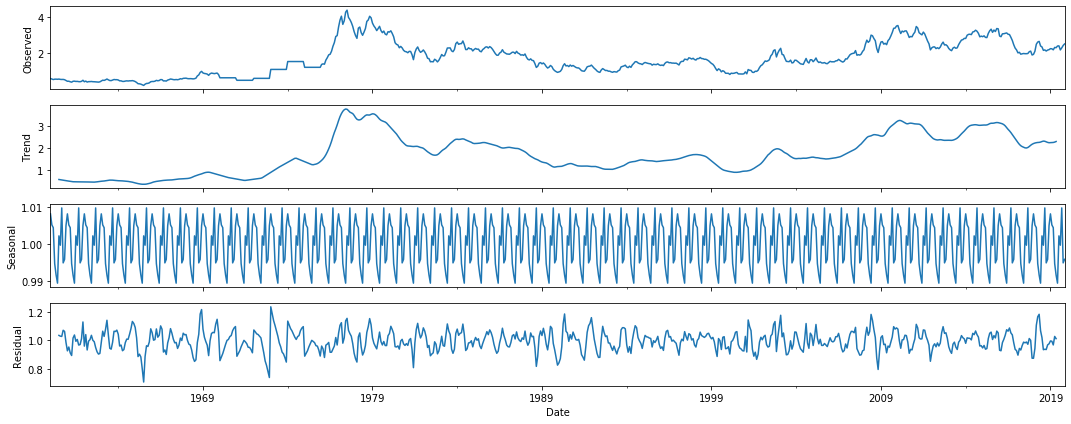

In [14]:
decompose = seasonal_decompose(ts, model='multiplicative' )
rcParams['figure.figsize'] = 15,6
fig = decompose.plot()

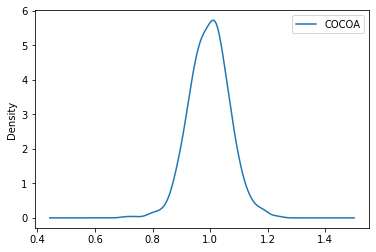

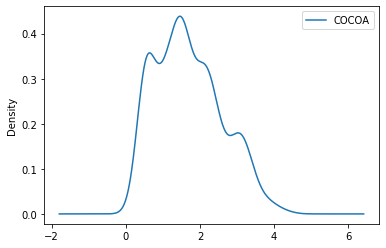

In [15]:
rcParams['figure.figsize'] = 6,4
fig = decompose.resid.plot(kind='kde')
fig_prob = ts.plot(kind='kde')
plt.show()

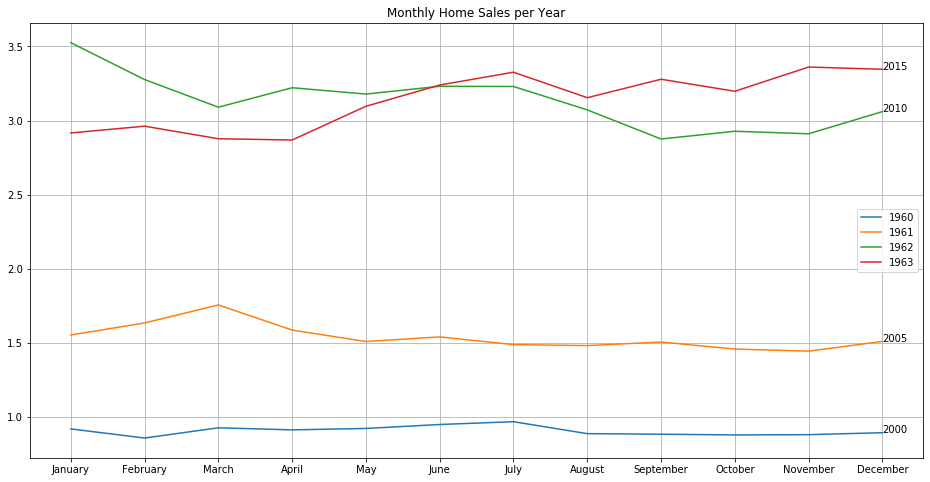

In [16]:
plt.figure(figsize=(16,8))
plt.grid(which='both')
years = int(np.round(len(ts)/12))
for i in range(40,60,5):
    index = ts.index[i*12:(i+1)*12]
    plt.plot(ts.index[:12].month_name(),ts.loc[index].values);
    plt.text(y=ts.loc[index].values[11], x=11, s=ts.index.year.unique()[i]);
plt.legend(ts.index.year.unique(), loc=0);
plt.title('Monthly Home Sales per Year');

In [17]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

In [18]:
def check_stationary(timeseries):
    # rolling statistic
    roll_mean = timeseries.rolling(12).mean()
    roll_std = timeseries.rolling(12).std()
    
    rcParams['figure.figsize'] = 15,6
    fig_mean = plt.plot(roll_mean, label="Rolling mean", color='red')
    fig_std = plt.plot(roll_std, label="Rolling Std", color='black')
    fig_ts = plt.plot(timeseries, label='Original_ts', color='blue')
    plt.legend(loc='best')
    plt.title("Rolling mean and Std")
    plt.show()
    
    adf_test = adfuller(timeseries, autolag='AIC')
    adf_output = pd.Series(adf_test[:2], index=['Test statistic', 'p-value'])
    print(adf_output)

In [19]:
def ploting_acf_pacf(timeseries):
    rcParams['figure.figsize'] = 18,5
    fig, axes = plt.subplots(1,2,squeeze=False)
    #fig.set_size_inches(16,4)
    plot_pacf(timeseries.dropna(), ax=axes[0,0], lags=24)
    plot_acf(timeseries.dropna(), ax=axes[0,1], lags=24)
    plt.show()

In [20]:
def spliting_data(timeseries, index):
    train_df = timeseries[:index]
    test_df = timeseries[index:]
    return (train_df, test_df)

In [21]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

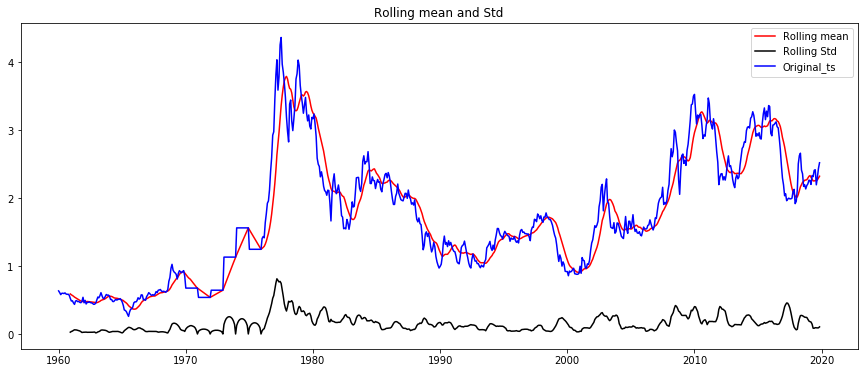

Test statistic   -2.077766
p-value           0.253548
dtype: float64


In [22]:
# checking the stationarity of original series
check_stationary(ts['COCOA'])

In [23]:
# making series to stationary by differencing it
ts['first_diff'] = ts['COCOA'].diff()

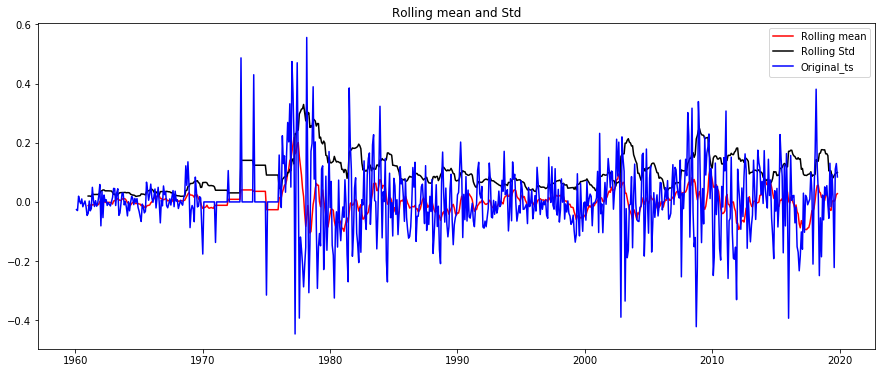

Test statistic   -8.814737e+00
p-value           1.948092e-14
dtype: float64


In [24]:
# checking again stationarity of first_diff series
check_stationary(ts['first_diff'].dropna())

In [25]:
ts.head()

,COCOA,first_diff
Date,,
1960-01-01,0.6340,NaN
1960-02-01,0.6080,-0.0260
1960-03-01,0.5789,-0.0291
1960-04-01,0.5983,0.0194
1960-05-01,0.6001,0.0018


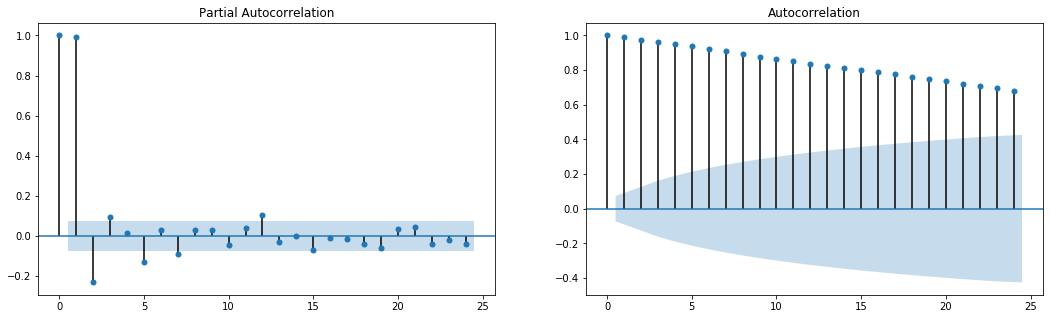

In [26]:
# ploting the plots for first_diff series
ploting_acf_pacf(ts['COCOA'].dropna())

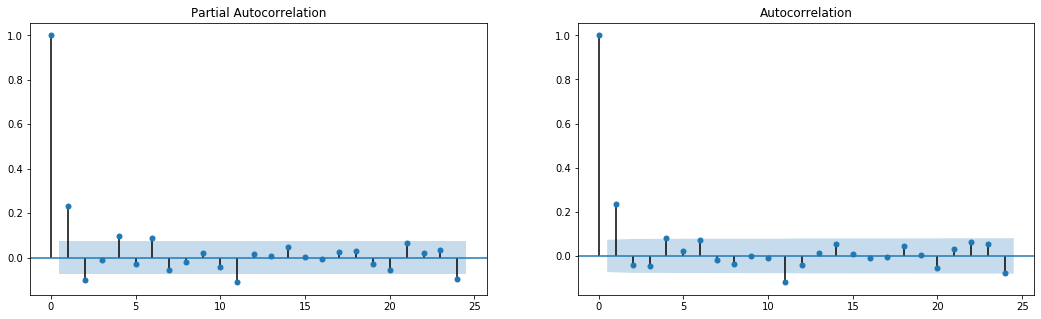

In [27]:
# ploting the plots for first_diff series
ploting_acf_pacf(ts['first_diff'].dropna())

In [28]:
# we  will use first_diff series to make model
# p,d,q values are 1,1,1 for a base model

In [29]:
from statsmodels.tsa.arima_model import ARIMA

In [30]:
def arima_model(train_ts, test_ts):
    best_aic = np.inf
    best_pdq = None
    p = q = range(3)
    d = [0,1,2]
    pdq = list(itertools.product(p,d,q))
    
    for param in pdq:
        try:
            model = ARIMA(train_ts.values, order=(param))
            results = model.fit(disp=-1)

            if results.aic < best_aic:
                best_aic = results.aic
                best_results = results
                best_pdq = param
        except:
            pass
    print(best_results.summary())

In [31]:
# spliting the series in train and test
train, test = spliting_data(ts['COCOA'], 700)

In [32]:
# modeling on first_diff series
arima_model(train.dropna(), None)

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  699
Model:                 ARIMA(1, 1, 2)   Log Likelihood                 542.732
Method:                       css-mle   S.D. of innovations              0.111
Date:                Thu, 12 Dec 2019   AIC                          -1075.464
Time:                        13:45:37   BIC                          -1052.716
Sample:                             1   HQIC                         -1066.670
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0029      0.006      0.515      0.607      -0.008       0.014
ar.L1.D.y     -0.8653      0.069    -12.457      0.000      -1.001      -0.729
ma.L1.D.y      1.1635      0.075     15.507      0.0

C:\Users\amar\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


C:\Users\amar\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\amar\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


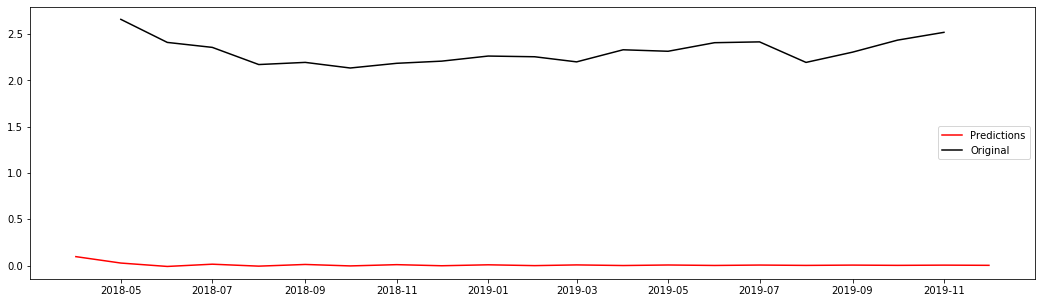

In [33]:
# making the super model
model = ARIMA(train.dropna(), order=(1,1,2))
results = model.fit()
preds = results.predict(start=699, end=719)
fig1 = plt.plot(preds, label='Predictions', color='red')
fig2 = plt.plot(test, label='Original', color='black')
#fig3 = plt.plot(ts['first_diff'][699:], label='first diff', color='blue')
plt.legend(loc='best')
plt.show()

In [34]:
preds = preds.add(preds.cumsum())

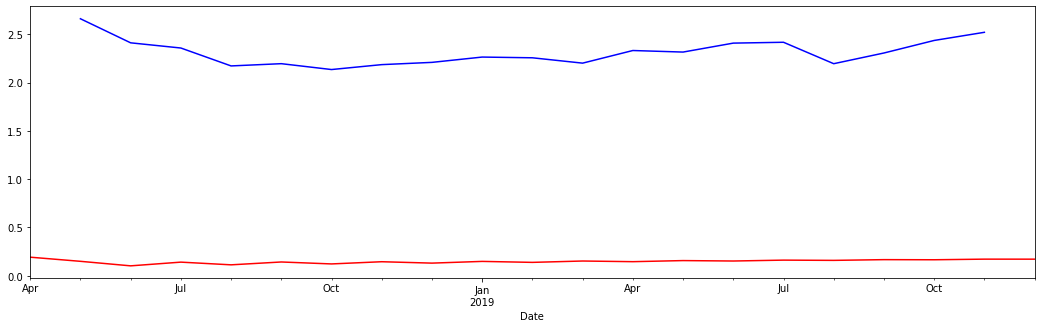

In [35]:
preds.plot(color='red')
test.plot(color='blue')
plt.show()

In [36]:
from sklearn.metrics import mean_absolute_error
def mean_abs_pct_error(actual_values, forecast_values):
    err=0
    for i in range(len(forecast_values)):
        err += np.abs(actual_values.values[i] - forecast_values.values[i])/actual_values.values[i]
    return (err* 100/len(forecast_values))

In [37]:
preds_best=results.predict(start=700, end =718,dynamic=True, typ='levels')
print("MAPE:{}%".format(np.round(mean_abs_pct_error(test ,preds_best),2)))
print("MAE:{}".format(np.round(mean_absolute_error(test.values, preds_best),2)))

MAPE:15.79%
MAE:0.36


In [38]:
predictions = results.predict(start=pd.to_datetime('2018-05-01'), end=pd.to_datetime('2020-10-01'), dynamic=True)

In [39]:
predictions_cumcum =  predictions.cumsum()

In [40]:
predictions = predictions.add(predictions_cumcum)

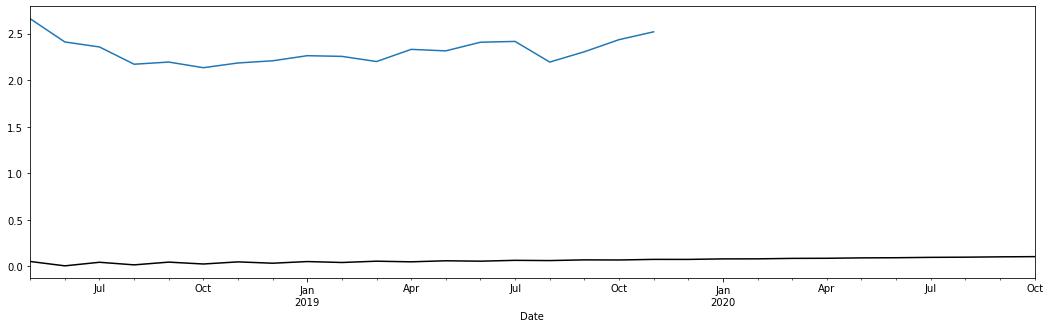

In [41]:
predictions.plot(color='black')
test.plot()
plt.show()

In [42]:
predictions[-1]

0.10509528744547089

In [43]:
ts.head()

,COCOA,first_diff
Date,,
1960-01-01,0.6340,NaN
1960-02-01,0.6080,-0.0260
1960-03-01,0.5789,-0.0291
1960-04-01,0.5983,0.0194
1960-05-01,0.6001,0.0018


In [44]:
ts.tail()

,COCOA,first_diff
Date,,
2019-07-01,2.41653,0.00880
2019-08-01,2.19470,-0.22183
2019-09-01,2.30542,0.11072
2019-10-01,2.43527,0.12985
2019-11-01,2.51966,0.08439


In [45]:
ts.to_csv("edited_ts.csv", index=True, sep=',')